## Project: Weather

The goal of this project is to predict the temperature for this data to evaluate model and second predict data for the next 12 months and all the risk to around that. So let me know the description about the data and secaond explain the main method on this project and what gonna be learn.
    
### **First about data**:

- **Date** : Informations about date since March 2004 to Febuary 2005
- **Time** : What time or period the data are registred
- **CO** : Averaged Concentration CO in mg/m^3
- **PT08.S1(CO)** : that's representated **the Tin Oxyde** hourly averaged sensor response (nominally CO Targeted)
- **NMHC(GT)** :  averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
- **C6H6(GT)** :  averaged Benzene concentration  in microg/m^3 (reference analyzer)
- **PT08.S2(NMHC)** : **titania** hourly averaged sensor response (nominally NMHC targeted)
- **NOx(GT)** : averaged NOx concentration  in ppb (reference analyzer)
- **PT08.S3(NOx)** : **tungsten oxide** hourly averaged sensor response (nominally NOx targeted)
- **NO2(GT)** : True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
- **PT08.S4(NO2)** : **tungsten oxide** hourly averaged sensor response (nominally NO2 targeted)
- **PT08.S5(O3)** : **indium oxide** hourly averaged sensor response (nominally O3 targeted)
- **T**: Temperature (Target for this project) in Celsius
- **RH** : Relative Humidity in (%)
- **AH** : Absolute Humidity

### **Second part**: 

- Import and cheking if we are null or NaN in the dataset
- Exploratory dataset Analysis (EDA):
  * **Describe** : To know the statistics ensemble to know many parametrics about dataset.
  * **Outliers or Noise** : If we have remove 
  *  **Heatmap** :to see the correlation between data.
  * **ScatterPlot** : To see how type equation we gonna have to know if we use LinearModel or PolynomialModel (Very Important) but we can use another model like ensemble model (Random Forest and others) if is not non Linear.
  * **KdePlot** : To see density and Average.
- **Preprocessing** : Start to transform the Numerical Columns and Non Numerical Columns
- Train ,Test and evaluate model
- Regularization to model : the main topic on this project :
  * Know what the Lasso(L1), Ridge(L2) and ElasticNet
  * Use the three models
  * Compare to know which perform better and why
  * Know what time we can use the three methods
- Save and Monitore the model for the Next-Time
  
So let's start project 😉

### Import and Checking Null Or Nan 📄

In [5]:
import numpy as np
import pandas as pd

In [7]:
# Import dataset
weather_df = pd.read_excel("C:/Users/angel/Downloads/Statistics For machine Learning/AirQualityUCI.xlsx")
weather_df.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [8]:
# Informations data

weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [9]:
# Checking if have null 

print(weather_df.isnull().sum().sort_values(ascending=False).head(10))

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
dtype: int64


**Observations**: When you use info() you can almost see if you are the null or not . The best thing for me to use isnull() 
when you have alot columns in your dataset to checking this.That's help you to save the time to you 😉

### 📈 Exploratory Dataset Analysis (EDA) 📊 

In [15]:
# Describe the target Temperature

print(weather_df["T"].describe())

count    9357.000000
mean        9.776600
std        43.203438
min      -200.000000
25%        10.950000
50%        17.200000
75%        24.075000
max        44.600000
Name: T, dtype: float64


In [17]:
# Remove the outlier

weather_df_clean = weather_df[weather_df["T"] > -15]

print(weather_df_clean["T"].sort_values(ascending=True).head(3))

# Describe again the dataset after we have removing the outlier

weather_df_clean["T"].describe()

8558   -1.900
8554   -1.375
8557   -1.275
Name: T, dtype: float64


count    8991.000000
mean       18.316054
std         8.832888
min        -1.900000
25%        11.787500
50%        17.750000
75%        24.400000
max        44.600000
Name: T, dtype: float64

We can see the impact noise before and after before the mean is so least maybe 10°C but when we remove the noise
the mean change very well and give maybe 18°C .It's increase maybe plus 8°C again 😳. The impact to noise is so powerfull.
So all time check if we have the noise on the dataset because is so powerfull.

### Visualization

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

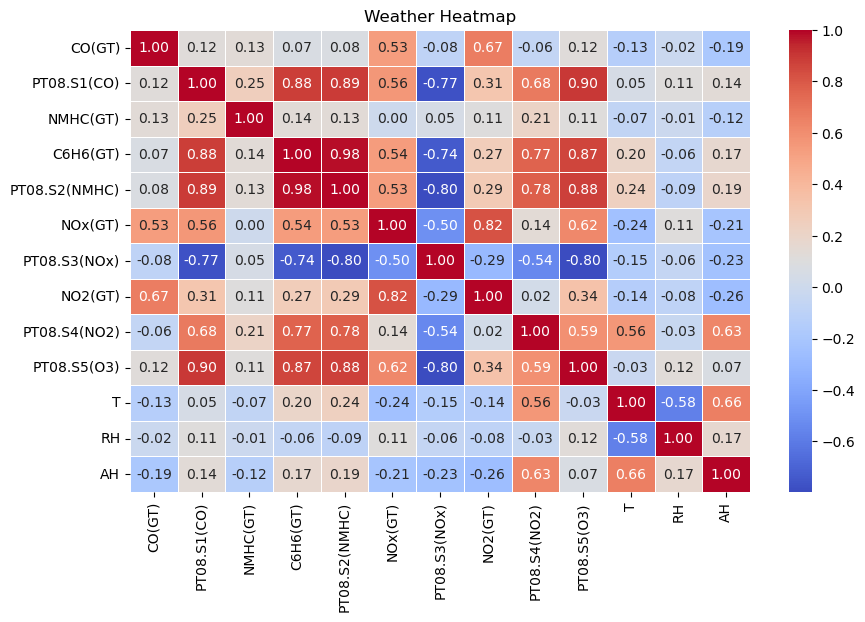

In [22]:
# Heatmap

def heatmap(df,title = "Weather Heatmap"):
    corr_matrix = df.corr()
    plt.figure(figsize=(10,6))

    sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5)
    plt.title(title)

    plt.show()

number_corr = weather_df_clean.select_dtypes(include=["number"])

heatmap(number_corr, "Weather Heatmap")

We can see the feature have most better correlation is the **Absolute humidity**. So I'm gonna use to make my scatterplot.

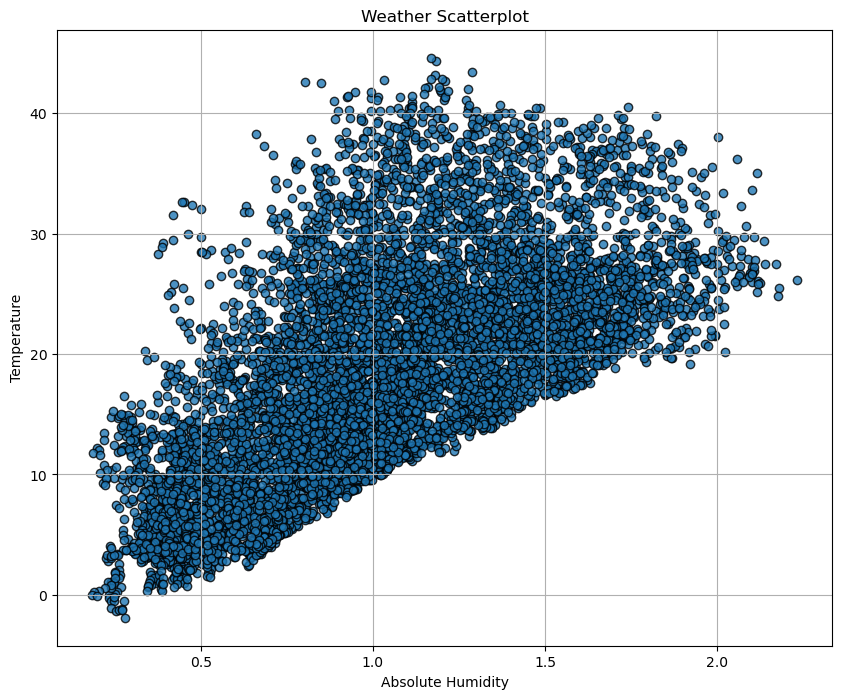

In [24]:
# Scatterplot

def scatterplot(df,title="Weather Scatterplot"):

    plt.figure(figsize=(10,8))
    plt.scatter(x=df["AH"],y=df["T"], alpha=0.8,edgecolor ="k")
    plt.title(title)
    plt.xlabel("Absolute Humidity")
    plt.ylabel("Temperature")
    plt.grid(True)
    plt.show()

scatterplot(weather_df_clean,"Weather Scatterplot")

We can see the like plus the AH is hight plus the temperature gonna increase. The most important information on this visualization is the points form the **straigth line** so we can say the simple Linear Model gonna perform well on this dataset.

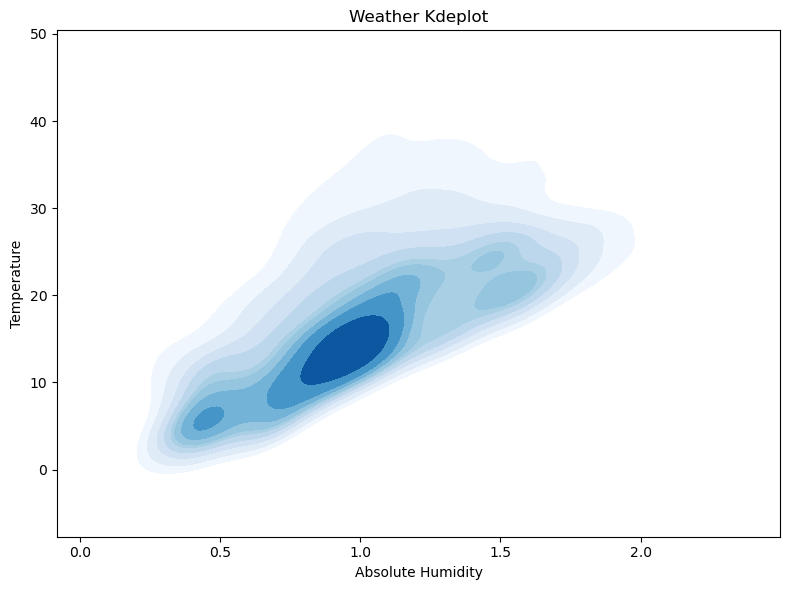

In [26]:
#KDEplot

def kdeplot(df,title="Weather Kdeplot"):

    plt.figure(figsize=(8,6))
    sns.kdeplot(df,x="AH",y="T",cmap="Blues",fill=True,thresh=0.1)

    plt.title(title)
    plt.xlabel("Absolute Humidity")
    plt.ylabel("Temperature")
    plt.tight_layout()
    plt.show()

kdeplot(weather_df_clean,"Weather Kdeplot")

### Preprocessing 🛠️

In [39]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [41]:
def preprocessing(df):

    # Define categorical and numeric columns
   categorical_cols = ["Date", "Time"]
   numeric_cols = ["CO(GT)", "PT08.S1(CO)", "NMHC(GT)", "C6H6(GT)", "PT08.S2(NMHC)","NOx(GT)", "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "RH", "AH"]

   X = df[categorical_cols + numeric_cols]
   y = df["T"]

   prepro = ColumnTransformer(
        transformers=[
            ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
            ("num", RobustScaler(),numeric_cols)
        ]
    )

   pipeline = Pipeline(steps=[
        ("prepro", prepro),
        ("model", LinearRegression())
    ])

   return pipeline

pipeline = preprocessing(weather_df_clean)

### Model Evaluation 🤖

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [46]:
def train_model(pipeline, df):
   
    categorical_cols = ["Date", "Time"]
    numeric_cols = ["CO(GT)", "PT08.S1(CO)", "NMHC(GT)", "C6H6(GT)", "PT08.S2(NMHC)","NOx(GT)", "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "RH", "AH"]

    
    X = df[categorical_cols + numeric_cols]
    y = df["T"]

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

    
    pipeline.fit(X_train, y_train)

    
    y_pred = pipeline.predict(X_test)

    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    
    print("*" * 20, "Metrics Scores", "*" * 20)
    metrics = {
        "Mean Absolute Error (MAE)": mae,
        "Mean Squared Error (MSE)": mse,
        "Root Mean Squared Error (RMSE)": rmse,
        "R² Score": r2
    }

    for key, value in metrics.items():
        print(f"{key}: {value:.4f}")

    return metrics


metrics_score = train_model(pipeline, weather_df_clean)

******************** Metrics Scores ********************
Mean Absolute Error (MAE): 1.1048
Mean Squared Error (MSE): 2.1320
Root Mean Squared Error (RMSE): 1.4601
R² Score: 0.9723


In [85]:
from sklearn.linear_model import Ridge, Lasso,ElasticNet

## Regularization of model

### Lasso Regression (L1)

**Least Absolute Shrinkage and Selection Operator (Lasso)** : Is one variant to the Linear Regression. 
It's one of the regularization method or the goal to add a penalty L1  in the model to reduce the most
possible the coefficients of some features in zero. the components is sometimes alpha(α) to have possibility to put the most features coefficients in 0.
It's very well to use this when the data don't have strong correlation.The example is down , we gonna use in this model how is work to adding more parameters in the model.

In [53]:
def lasso(df):
    categorical_cols = ["Date", "Time"]
    numeric_cols = ["CO(GT)", "PT08.S1(CO)", "NMHC(GT)", "C6H6(GT)", "PT08.S2(NMHC)","NOx(GT)", "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "RH", "AH"]

    X = df[categorical_cols + numeric_cols]
    y = df["T"]

    prepro = ColumnTransformer(transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", RobustScaler(), numeric_cols)
    ])

    model_lasso = Lasso(
        alpha=0.0000005,
        fit_intercept=True,
        max_iter=4700,
        tol=1e-6,
        warm_start=True,
        positive=False,
        selection='random',
        random_state=42
    )

    pipeline = Pipeline(steps=[
        ("prepro", prepro),
        ("model", model_lasso)
    ])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print("*" * 20, "Lasso Metrics Scores", "*" * 20)
    metrics = {
        "Mean Absolute Error (MAE)": mae,
        "Mean Squared Error (MSE)": mse,
        "Root Mean Squared Error (RMSE)": rmse,
        "R² Score": r2
    }

    for key, value in metrics.items():
        print(f"{key}: {value:.4f}")

    return metrics
   
metrics_lasso = lasso(weather_df_clean)

******************** Lasso Metrics Scores ********************
Mean Absolute Error (MAE): 1.1046
Mean Squared Error (MSE): 2.1298
Root Mean Squared Error (RMSE): 1.4594
R² Score: 0.9723


C:\Users\angel\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4018.611131164126, tolerance: 0.49381294883549093
  model = cd_fast.sparse_enet_coordinate_descent(


#### Conclusion

You can see the Lasso try to reduce with the parameters I provide to reduce the most features . R2 don't change but we can't see others change like **MAE,MSE OR RMSE** is not the same. The varaiation is not so important but the is try to reduce and we gain **+0.0001% or +0.0002%** .It's not to bad because the model without regualrization perform very  well. It's good to use when we have so much features in the dataset. The really Incovenient with this regualrization is so slow to execute the model difference between the next regularization we gonna see next is more speed than this method.

### Ridge Regression (L2)

Ridge regression is a variation of linear regression that uses an L2 penalization to reduce the importance of coefficients without completely canceling them. It is particularly useful in the presence of collinearity between variables.With have the same alpha , he have power to reduce the cadence of model plus the model have hight alpha is gonna be more strong with the selection and reduction.

In [58]:
def ridge(df):
    
    categorical_cols = ["Date", "Time"]
    numeric_cols = ["CO(GT)", "PT08.S1(CO)", "NMHC(GT)", "C6H6(GT)", "PT08.S2(NMHC)","NOx(GT)", "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "RH", "AH"]

    X = df[categorical_cols + numeric_cols]
    y = df["T"]

    prepro = ColumnTransformer(transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", RobustScaler(), numeric_cols)
    ])

    
    model_ridge = Ridge(
    alpha=0.00000001,
    fit_intercept=True,
    max_iter=4700,
    tol=1e-10,
    solver="auto",
    random_state=1
   )
    
    pipeline = Pipeline(steps=[
        ("prepro", prepro),
        ("model", model_ridge)
    ])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print("*" * 20, "Ridge Metrics Scores", "*" * 20)
    metrics = {
        "Mean Absolute Error (MAE)": mae,
        "Mean Squared Error (MSE)": mse,
        "Root Mean Squared Error (RMSE)": rmse,
        "R² Score": r2
    }

    for key, value in metrics.items():
        print(f"{key}: {value:.4f}")

    return metrics
   
metrics_ridge = ridge(weather_df_clean)

******************** Ridge Metrics Scores ********************
Mean Absolute Error (MAE): 1.1046
Mean Squared Error (MSE): 2.1297
Root Mean Squared Error (RMSE): 1.4594
R² Score: 0.9723


#### Conlusion

It's the same like Lasso the only difference with Lasso it's perform more better on some metrics like **MSE and RMSE** the difference is not very important is like only **0.0001%** and is more speed than Lasso because he don't take all features to reduce completely in zero is that is more speed. Very well when the model don't have so much noise and if you want more speed for the time.

###  ElasticNet

**ElasticNet regression** : is a combination of Lasso (L1) and Ridge (L2), providing both the variable selection of Lasso and the stability of Ridge in the presence of strong correlations between variables. It minimizes a cost function which includes a mixed penalization, controlled by two hyperparameters: α (strength of the regularization) and l1_ratio (ratio between L1 and L2). When l1_ratio = 1, ElasticNet works like Lasso by setting certain coefficients to 0, and when l1_ratio = 0, it behaves like Ridge, reducing the importance of coefficients without canceling them. This is especially useful when Lasso eliminates too many variables and Ridge doesn't select enough. Its use is ideal to avoid overfitting while simplifying the model in case of highly correlated data. If you're looking for a good balance between feature selection and robustness, ElasticNet is often the best choice. Because is the ground between L1 and L2 so you have so much possibility to control the model.🚀

In [75]:
def elasticnet(df):
    
    categorical_cols = ["Date", "Time"]
    numeric_cols = ["CO(GT)", "PT08.S1(CO)", "NMHC(GT)", "C6H6(GT)", "PT08.S2(NMHC)","NOx(GT)", "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "RH", "AH"]

    X = df[categorical_cols + numeric_cols]
    y = df["T"]

    prepro = ColumnTransformer(transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", RobustScaler(), numeric_cols)
    ])

    
    model_elasticnet = ElasticNet(
    alpha=0.0000005,
    l1_ratio=0.5,
    fit_intercept=True,
    max_iter=4700,
    tol=1e-6,
    selection="cyclic",
    random_state=42
    )
    
    pipeline = Pipeline(steps=[
        ("prepro", prepro),
        ("model", model_elasticnet)
    ])

    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print("*" * 20, "ElasticNet Metrics Scores", "*" * 20)
    metrics = {
        "Mean Absolute Error (MAE)": mae,
        "Mean Squared Error (MSE)": mse,
        "Root Mean Squared Error (RMSE)": rmse,
        "R² Score": r2
    }

    for key, value in metrics.items():
        print(f"{key}: {value:.4f}")

    return metrics
   
metrics_elasticnet = elasticnet(weather_df_clean)

******************** ElasticNet Metrics Scores ********************
Mean Absolute Error (MAE): 1.1045
Mean Squared Error (MSE): 2.1300
Root Mean Squared Error (RMSE): 1.4595
R² Score: 0.9723


C:\Users\angel\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5722.571790592175, tolerance: 0.49381294883549093
  model = cd_fast.sparse_enet_coordinate_descent(


#### Conclusion

 We can see **ElasticNet** perform more better overall against **Lasso & Ridge** in this dataset. It's because like we say is the ground between the is like the fusion of the both. He take the power L1 and take power L2 and work we that to perform more better. It can pass in any type dataset big or Small is gonna perform.

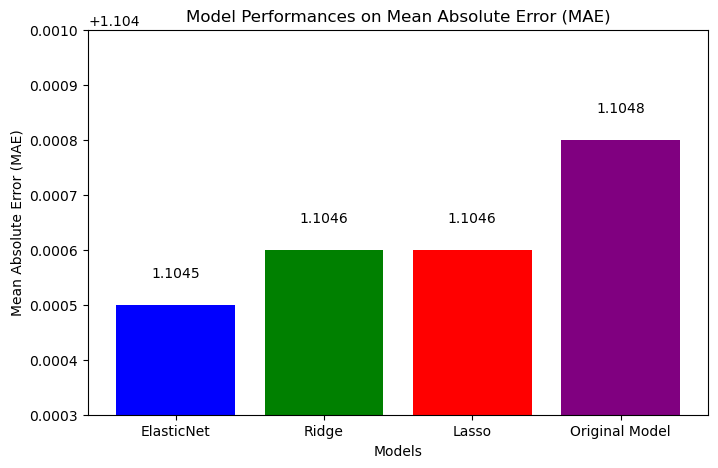

In [78]:
#the name model
models = ["ElasticNet", "Ridge", "Lasso", "Original Model"]

# the model mae
mae_values = [1.1045, 1.1046, 1.1046, 1.1048]

#graphics
plt.figure(figsize=(8, 5))
plt.bar(models, mae_values, color=['blue', 'green', 'red', 'purple'])


for i, v in enumerate(mae_values):
    plt.text(i, v + 0.00005, f"{v:.4f}", ha='center', fontsize=10)


plt.title("Model Performances on Mean Absolute Error (MAE)")
plt.ylabel("Mean Absolute Error (MAE)")
plt.xlabel("Models")
plt.ylim(min(mae_values) - 0.0002, max(mae_values) + 0.0002)


plt.show()

👁️ plus the **MAE or MSE** is small plus is so better very helpful to analyze the performances model 🙂.

In [80]:
import joblib

# Save Pipeline
joblib.dump(pipeline, "pipeline_model.pkl")

['pipeline_model.pkl']

For the next time 🙂